In [1]:
#
# hw5pr2digits:  digits clasification via decision trees and random forests...
#

In [2]:
#
# Let's use the data to create "more informed" models
#

In [3]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [4]:
# let's read in our flower data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'digits.csv'
df = pd.read_csv(filename, header=0)   # encoding="latin1" et al.
print(f"{filename} : file read into a pandas dataframe.")

# [[ for hw5pr1's conversion:  the new file will be needed here ]]

digits.csv : file read into a pandas dataframe.


In [5]:
#
# a dataframe is a "spreadsheet in Python"   (seems to have an extra column!)
#
pd.set_option('display.max_rows', 10)     # None for no limit; default: 10
# pd.set_option('display.min_rows', 150)   # min_rows is not universally supported...
# let's view it!
df

# [[ for hw5pr1's conversion:  no changes needed here ]]

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit,excerpted from http://yann.lecun.com/exdb/mnist/
0,0,0,9,14,8,1,0,0,0,0,...,0,0,11,16,15,11,1,0,8,NaN
1,0,0,11,12,0,0,0,0,0,2,...,0,0,9,12,13,3,0,0,9,NaN
2,0,0,1,9,15,11,0,0,0,0,...,0,0,1,10,13,3,0,0,0,NaN
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,1,13,16,1,0,1,NaN
4,0,0,5,12,1,0,0,0,0,0,...,0,0,3,11,8,13,12,4,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,2,14,15,9,0,0,9,NaN
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,6,16,14,6,0,0,0,NaN
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,2,9,13,6,0,0,8,NaN
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,5,12,16,12,0,0,9,NaN


In [6]:
#
# let's look at our pandas dataframe   (Aargh: that extra column!)
#
df.info()

# [[ for hw5pr1's conversion:  no changes needed here ]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 66 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   pix0                                              1768 non-null   int64  
 1   pix1                                              1768 non-null   int64  
 2   pix2                                              1768 non-null   int64  
 3   pix3                                              1768 non-null   int64  
 4   pix4                                              1768 non-null   int64  
 5   pix5                                              1768 non-null   int64  
 6   pix6                                              1768 non-null   int64  
 7   pix7                                              1768 non-null   int64  
 8   pix8                                              1768 non-null   int64  
 9   pix9               

In [7]:
#
# let's drop that last column (dropping is usually by _name_):
#
#   if you want a list of the column names use df.columns
col65name = df.columns[65]  # get column name at index 65
df_clean = df.drop(columns=[col65name])  # drop by name is typical
df_clean.info()                              # should be happier!

# [[ for hw5pr1's conversion:  there's a different column to drop... ]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

In [8]:
#
# let's keep our column names in variables, for reference
#
COLUMNS = df_clean.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}")

# [[ for hw5pr1's conversion:  no changes needed here ]]

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [9]:
#
# let's look at our cleaned-up dataframe...
#
df_clean.info()   
#
# notice that the non-null is _different_ for irisname!
df_clean   # show a table! (the problem rows are the last two...)

# [[ for hw5pr1's conversion:  no changes needed here ]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [10]:
#
# typically, after dropping columns we don't want, 
#   we drop rows with missing data (other approaches are possible, too)
#
df_full = df_clean.dropna()   # this removes all rows with missing data ("na")
df_full.info()                # it's "full" because it has no missing data
df_full
#
# notice that _all_ of the rows now have 142 non-null items
#    also, the last row isn't real data... we'll handle it next

# [[ for hw5pr1's conversion:  no changes needed here ]]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19  pix19         1768 non-null

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [11]:
# 
# get rid of last row!
#
# df_final = df_full     # not the syntax I would choose
# print(df_final.shape)
# df_final

# [[ for hw5pr1's conversion:  many "wrong" rows are scattered throughout births.csv;
#     however, it's totally ok to keep them for hw5pr1's purposes! (up to you) ]]

In [12]:
# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

NUMBER = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]   # int to str

def convert_species(NUMBER):
    """ return the species index (a unique integer/category) """  # 190942 births 
    #print(f"converting {speciesname}...")
    s = int(NUMBER)
    return s

# Let's try it out...
for number in range(10):
    print(f"{number} maps to {convert_species(number)}")
    
# [[ for hw5pr1's conversion:  it's good to have SPECIES!
#      This will need updating for the "above median" and "below median" species ]] 

0 maps to 0
1 maps to 1
2 maps to 2
3 maps to 3
4 maps to 4
5 maps to 5
6 maps to 6
7 maps to 7
8 maps to 8
9 maps to 9


In [13]:
#
# we can "apply" a function to a whole column
#   it may give a warning; here, this is ok ...
#

# df_final['number'] = df_final['number'].apply(convert_species)

# Don't run this twice: the data will be different the second time!
#   (In reality, feel free to go back and re-run cells to re-establish things... :-)
#    Don't worry about the (possible)  "SettingWithCopyWarning" here...

# [[ for hw5pr1's conversion:  you may or may not need this... ]]

In [14]:
#
# let's see it!  (this is safe to run many times...)
#
# df_final         # print(df_final.to_string())  # for _all_ rows...

# [[ for hw5pr1's conversion:  no changes needed ]]

In [15]:
#
# let's convert our dataframe to a numpy array, named A
#    Our ML library, scikit-learn operates entirely on numpy arrays.
#
A = df_full.values    # .values gets the numpy array
print(A)

# [[ for hw5pr1's conversion:  no changes needed ]]

[[ 0  0  9 ...  1  0  8]
 [ 0  0 11 ...  0  0  9]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  1 ...  0  0  8]
 [ 0  0  2 ...  0  0  9]
 [ 0  0 10 ...  1  0  8]]


In [16]:
#
# let's make sure it's all floating-point, so we can multiply and divide
#
A = A.astype('float64')  # so many:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

# [[ for hw5pr1's conversion:  no changes needed ]]

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [17]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# [[ for hw5pr1's conversion:  no changes needed ]]


The dataset has 1768 rows and 65 cols


In [18]:
# let's use all of our variables, to reinforce names...

# choose a row index, n:
n = 5
print(f"row #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    if colname != 'actual_digit':
        print(f"  Its {colname} is {A[n][i]}")
    else:
        species_num = int(A[n][i])
        species = NUMBER[species_num]
        print(f"  Its {colname} is {species} ({species_num})")

row #5 is [ 0.  2.  9. 15. 14.  9.  3.  0.  0.  4. 13.  8.  9. 16.  8.  0.  0.  0.
  0.  6. 14. 15.  3.  0.  0.  0.  0. 11. 14.  2.  0.  0.  0.  0.  0.  2.
 15. 11.  0.  0.  0.  0.  0.  0.  2. 15.  4.  0.  0.  1.  5.  6. 13. 16.
  6.  0.  0.  2. 12. 12. 13. 11.  0.  0.  3.]
  Its pix0 is 0.0
  Its pix1 is 2.0
  Its pix2 is 9.0
  Its pix3 is 15.0
  Its pix4 is 14.0
  Its pix5 is 9.0
  Its pix6 is 3.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 4.0
  Its pix10 is 13.0
  Its pix11 is 8.0
  Its pix12 is 9.0
  Its pix13 is 16.0
  Its pix14 is 8.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 0.0
  Its pix19 is 6.0
  Its pix20 is 14.0
  Its pix21 is 15.0
  Its pix22 is 3.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 0.0
  Its pix27 is 11.0
  Its pix28 is 14.0
  Its pix29 is 2.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 0.0
  Its pix34 is 0.0
  Its pix35 is 2.0
  Its pix36 is 15.0
  Its pix37 is 11.0
  I

In [19]:
#
# we could write-our-own, but we don't have to! Let's "library"! After all,
#
#     the representation and storage for the trees is a big task
#     we want an already-debugged algorithm!
#     we want to ask q'ns about irises and how "classifiable" they are, 
#        rather than questions about implementation (at least for this moment...)
#

In [20]:
print("+++ Start of data definitions +++\n")

X_all = A[:,0:64]  # X (features) 
y_all = A[:,64]    # y (labels) 

print(f"X_all (just features) is \n {X_all}")
print(f"y_all (just labels)   is \n {y_all}")

+++ Start of data definitions +++

X_all (just features) is 
 [[ 0.  0.  9. ... 11.  1.  0.]
 [ 0.  0. 11. ...  3.  0.  0.]
 [ 0.  0.  1. ...  3.  0.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
y_all (just labels)   is 
 [8. 9. 0. ... 8. 9. 8.]


In [21]:
#
# we can re-weight different features here...
#

# The pixels are weighted evenly against each other, so we deleted the re-weight section

# [[ for hw5pr1's conversion:  change to the correct column names! 
#      admittedly, however, no weighting is needed until hw5pr2's titanic datset...   ]]

In [22]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(X_labeled)
print(y_labeled)

# [[ for hw5pr1's conversion:  no changes needed ]] 

[[ 0.  0.  3. ...  0.  0.  0.]
 [ 0.  0.  2. ...  5.  0.  0.]
 [ 0.  0.  0. ...  8.  0.  0.]
 ...
 [ 0.  0.  2. ...  9.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ... 13.  3.  0.]]
[7. 5. 0. ... 0. 4. 2.]


In [23]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = X_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

X_test = X_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

X_train = X_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

# [[ for hw5pr1's conversion:  no changes needed ]] 

training with 1415 rows;  testing with 353 rows


In [24]:
print(f"y_test is {y_test}")
print(f"y_train is {y_train}")   # to "get a visual" on these...
# print(X_test)
# print(X_train)

# [[ for hw5pr1's conversion:  no changes needed ]] 

y_test is [7. 5. 0. 6. 4. 4. 6. 2. 2. 2. 3. 2. 7. 7. 6. 9. 0. 3. 5. 5. 4. 0. 8. 2.
 3. 5. 3. 2. 7. 6. 0. 8. 2. 3. 4. 9. 9. 6. 8. 3. 0. 6. 9. 4. 6. 9. 4. 7.
 6. 2. 7. 7. 8. 7. 5. 7. 7. 0. 2. 1. 8. 3. 3. 6. 5. 6. 6. 3. 8. 7. 8. 8.
 7. 7. 5. 9. 7. 1. 1. 7. 8. 3. 8. 9. 4. 3. 1. 2. 2. 5. 2. 2. 0. 4. 2. 4.
 0. 9. 9. 3. 4. 7. 3. 7. 5. 9. 2. 4. 6. 1. 4. 1. 7. 0. 3. 5. 1. 9. 3. 6.
 5. 6. 8. 8. 4. 9. 9. 8. 6. 9. 0. 2. 3. 6. 9. 9. 5. 5. 7. 6. 7. 6. 7. 4.
 0. 9. 8. 2. 5. 3. 4. 6. 7. 9. 9. 6. 8. 5. 1. 0. 5. 5. 4. 1. 6. 6. 9. 9.
 5. 4. 0. 1. 9. 3. 6. 3. 3. 9. 6. 6. 1. 5. 6. 6. 6. 6. 2. 4. 5. 2. 8. 8.
 1. 0. 8. 6. 1. 1. 2. 4. 8. 1. 1. 6. 5. 5. 0. 7. 5. 7. 3. 3. 5. 8. 5. 2.
 5. 6. 4. 1. 3. 2. 9. 9. 5. 4. 4. 8. 5. 3. 1. 7. 7. 4. 6. 7. 1. 6. 4. 3.
 9. 1. 7. 9. 4. 4. 4. 4. 0. 7. 3. 0. 3. 3. 6. 8. 1. 3. 4. 5. 0. 4. 9. 1.
 6. 9. 0. 8. 0. 8. 7. 6. 5. 4. 8. 0. 0. 8. 8. 6. 1. 4. 4. 4. 2. 8. 8. 2.
 9. 0. 0. 7. 8. 6. 2. 9. 7. 5. 5. 5. 1. 6. 3. 1. 1. 1. 3. 3. 3. 4. 7. 0.
 0. 8. 1. 8. 9. 9. 3. 2. 7. 6. 9. 0. 9. 5

In [25]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 1   # we don't know what depth to use, so we guess...
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]] 

Created and trained a DT classifier with max depth = 1


In [26]:
#
# Function to print testing results in a vertical table (or, an excuse to f-string?)
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {NUMBER[p]:>12s} {NUMBER[a]:<12s}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# [[ for hw5pr1's conversion:  a _few_ changes needed, 
#     depending on whether you defined SPECIES and the d/s datatypes ]] 

In [27]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed, as long as compare_labels is set ]]

Predicted labels: [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.

61

In [28]:
#
# let's see the tree!
#

filename = 'tree_depth_' + str(best_depth) + '.gv'  # preferred over .dot

tree.export_graphviz(dtree_model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=NUMBER,      # good to have   
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")

with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
#
# Lab task:  build three trees at depths 1, 2, and 3 (submit with the notebooks!)
#

# [[ for hw5pr1's conversion:  no changes needed, as long as you have SPECIES ]]

file tree_depth_1.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="pix36 <= 0.5\ngini = 0.9\nsamples = 1415\nvalue = [144, 147, 146, 144, 140, 140, 134, 141, 140, 139]\nclass = 1", fillcolor="#ffffff"] ;
1 [label="gini = 0.544\nsamples = 220\nvalue = [140, 0, 4, 1, 4, 20, 4, 0, 2, 45]\nclass = 0", fillcolor="#f1bb94"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.888\nsamples = 1195\nvalue = [4, 147, 142, 143, 136, 120, 130, 141, 138, 94]\nclass = 1", fillcolor="#fffffe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


In [29]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1    (only 1 split) 
# There's no way to model three species with only 1 split!
#
# So, we try several depths...
# Here, the tradeoff is not so much "more accurate" 
#       + deeper always has the potential to be more accurate
#       + at the risk of overfitting the training data!
#
# Rather it's the underfitting(bias)/overfitting(variance) tradeoff
#

In [30]:
#
# So, to compare different depths, let's use cross validation
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

best_accuracy = 0
for d in range(1, 11):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # if we want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_depth = d
    print(f"depth: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    
    
# assign best value of d to best_depth 
print()
print(f"best_depth = {best_depth} is our choice for underfitting/overfitting balance.")  

# [[ for hw5pr1's conversion:  no changes needed ]]

depth:  1  cv accuracy:  0.2028
depth:  2  cv accuracy:  0.3067
depth:  3  cv accuracy:  0.4587
depth:  4  cv accuracy:  0.5816
depth:  5  cv accuracy:  0.6799
depth:  6  cv accuracy:  0.7739
depth:  7  cv accuracy:  0.8254
depth:  8  cv accuracy:  0.8410
depth:  9  cv accuracy:  0.8509
depth: 10  cv accuracy:  0.8502

best_depth = 9 is our choice for underfitting/overfitting balance.


In [31]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
# Now, using the tuned value...
#
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a DT classifier with max depth = 9


In [32]:
#
# Re-create and re-run the  "Model-testing Cell"     How does it do with best_k?!
#
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed ]]

Predicted labels: [7. 5. 0. 1. 4. 4. 6. 2. 2. 8. 3. 2. 7. 7. 6. 9. 0. 3. 5. 5. 4. 0. 8. 2.
 3. 3. 3. 2. 7. 6. 0. 8. 1. 3. 4. 9. 9. 3. 8. 3. 0. 6. 9. 4. 6. 4. 4. 7.
 6. 2. 7. 7. 8. 7. 7. 7. 7. 0. 2. 1. 8. 3. 3. 6. 9. 6. 6. 7. 8. 7. 8. 8.
 7. 4. 9. 8. 7. 1. 1. 7. 8. 3. 8. 3. 4. 7. 1. 2. 2. 5. 2. 2. 0. 7. 1. 5.
 0. 9. 9. 3. 4. 7. 8. 7. 5. 7. 2. 4. 6. 1. 4. 1. 7. 0. 3. 5. 1. 9. 3. 6.
 4. 6. 1. 8. 4. 9. 9. 9. 6. 8. 0. 2. 3. 6. 9. 9. 5. 5. 7. 6. 2. 6. 9. 4.
 0. 9. 8. 2. 5. 3. 4. 6. 7. 9. 9. 6. 5. 5. 7. 0. 5. 5. 4. 1. 6. 6. 9. 1.
 9. 4. 0. 3. 9. 3. 6. 3. 3. 9. 6. 6. 1. 5. 6. 6. 6. 6. 2. 4. 5. 2. 8. 8.
 1. 0. 1. 6. 1. 1. 2. 4. 8. 1. 9. 6. 5. 5. 0. 7. 5. 3. 3. 3. 5. 8. 5. 2.
 5. 6. 4. 1. 3. 2. 9. 9. 5. 4. 4. 8. 6. 3. 1. 7. 3. 4. 6. 7. 1. 6. 4. 3.
 9. 1. 7. 9. 4. 4. 4. 4. 0. 7. 3. 0. 3. 3. 6. 8. 3. 6. 4. 5. 0. 4. 9. 1.
 6. 9. 0. 1. 0. 8. 7. 6. 5. 4. 8. 0. 0. 8. 2. 6. 1. 9. 1. 4. 7. 8. 8. 2.
 9. 0. 0. 7. 8. 6. 2. 9. 7. 5. 5. 5. 1. 6. 3. 1. 1. 1. 7. 3. 3. 5. 1. 0.
 0. 8. 1. 2. 9. 9. 8. 2. 0. 6. 9.

298

In [33]:
#
# Ok!  We have tuned our DT to use the "best" depth...
#
# Now, we use ALL available data to train our final predictive model:
#

from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

# [[ for hw5pr1's conversion:  no changes needed ]]

Created and trained a 'final' DT classifier with max depth = 9


In [34]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = dtree_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = NUMBER[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#

Features = [0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

# [[ for hw5pr1's conversion:  need to change to allow the right inputs! ]]

I predict 8 (8) from Features [0, 0, 9, 14, 8, 1, 0, 0, 0, 0, 12, 14, 14, 12, 0, 0, 0, 0, 9, 10, 0, 15, 4, 0, 0, 0, 3, 16, 12, 14, 2, 0, 0, 0, 4, 16, 16, 2, 0, 0, 0, 3, 16, 8, 10, 13, 2, 0, 0, 1, 15, 1, 3, 16, 8, 0, 0, 0, 11, 16, 15, 11, 1, 0]


In [35]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = [[0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0],
[0,0,11,12,0,0,0,0,0,2,16,16,16,13,0,0,0,3,16,12,10,14,0,0,0,1,16,1,12,15,0,0,0,0,13,16,9,15,2,0,0,0,0,3,0,9,11,0,0,0,0,0,9,15,4,0,0,0,9,12,13,3,0,0],
[0,0,1,9,15,11,0,0,0,0,11,16,8,14,6,0,0,2,16,10,0,9,9,0,0,1,16,4,0,8,8,0,0,4,16,4,0,8,8,0,0,1,16,5,1,11,3,0,0,0,12,12,10,10,0,0,0,0,1,10,13,3,0,0],
]
      
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

# these flowers' coded species: 012001122

I predict 8 (8) from Features [0, 0, 9, 14, 8, 1, 0, 0, 0, 0, 12, 14, 14, 12, 0, 0, 0, 0, 9, 10, 0, 15, 4, 0, 0, 0, 3, 16, 12, 14, 2, 0, 0, 0, 4, 16, 16, 2, 0, 0, 0, 3, 16, 8, 10, 13, 2, 0, 0, 1, 15, 1, 3, 16, 8, 0, 0, 0, 11, 16, 15, 11, 1, 0]
I predict 9 (9) from Features [0, 0, 11, 12, 0, 0, 0, 0, 0, 2, 16, 16, 16, 13, 0, 0, 0, 3, 16, 12, 10, 14, 0, 0, 0, 1, 16, 1, 12, 15, 0, 0, 0, 0, 13, 16, 9, 15, 2, 0, 0, 0, 0, 3, 0, 9, 11, 0, 0, 0, 0, 0, 9, 15, 4, 0, 0, 0, 9, 12, 13, 3, 0, 0]
I predict 0 (0) from Features [0, 0, 1, 9, 15, 11, 0, 0, 0, 0, 11, 16, 8, 14, 6, 0, 0, 2, 16, 10, 0, 9, 9, 0, 0, 1, 16, 4, 0, 8, 8, 0, 0, 4, 16, 4, 0, 8, 8, 0, 0, 1, 16, 5, 1, 11, 3, 0, 0, 0, 12, 12, 10, 10, 0, 0, 0, 0, 1, 10, 13, 3, 0, 0]


In [36]:
#
# That's it!  Welcome to the world of Decision-Tree models!    
#

#
# But wait, there's more!  More workflows, and more trees!  Random Forests next:
#

In [37]:
#
# Random Forests!!!
#

# Lots of trees, each using a partial fraction of the data
#      that get together to vote on the correct classification...

In [38]:
#
# +++ This is the "Model-building and Model-training Cell"
#       
# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = 4       # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_depth} and #trees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]] 

Built an RF with depth=4 and #trees=42


In [39]:
#
# +++ This is the "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed, if compare_labels is set ]]

Predicted labels: [7. 5. 0. 1. 4. 4. 6. 2. 2. 2. 3. 2. 7. 7. 6. 9. 0. 3. 5. 5. 7. 0. 8. 2.
 3. 5. 3. 2. 7. 6. 0. 7. 2. 3. 4. 9. 9. 6. 8. 3. 0. 6. 9. 4. 6. 9. 4. 7.
 6. 2. 7. 7. 2. 7. 5. 7. 7. 0. 2. 1. 2. 3. 3. 6. 9. 6. 6. 7. 2. 7. 2. 1.
 7. 7. 9. 8. 7. 1. 1. 7. 8. 3. 2. 9. 4. 7. 9. 2. 2. 5. 2. 2. 0. 7. 2. 4.
 0. 9. 9. 3. 4. 7. 2. 7. 5. 7. 2. 4. 6. 1. 4. 1. 7. 0. 3. 5. 1. 9. 3. 6.
 9. 6. 1. 8. 4. 9. 9. 8. 6. 7. 0. 2. 3. 6. 9. 9. 5. 5. 7. 6. 7. 6. 7. 4.
 0. 9. 3. 2. 5. 3. 4. 6. 7. 9. 9. 6. 1. 5. 1. 0. 5. 5. 4. 1. 6. 6. 9. 3.
 9. 4. 0. 1. 9. 3. 6. 3. 3. 9. 6. 6. 1. 5. 6. 6. 6. 6. 2. 4. 5. 2. 2. 8.
 1. 0. 2. 6. 1. 1. 2. 4. 8. 1. 9. 6. 5. 0. 0. 7. 5. 4. 3. 3. 5. 8. 5. 3.
 5. 6. 4. 1. 9. 2. 9. 9. 5. 4. 4. 1. 5. 3. 1. 7. 7. 4. 6. 7. 9. 6. 7. 3.
 9. 1. 7. 9. 4. 4. 4. 4. 0. 7. 3. 0. 3. 3. 6. 8. 3. 3. 4. 5. 0. 4. 8. 1.
 6. 9. 0. 1. 0. 8. 7. 6. 5. 4. 1. 0. 0. 2. 8. 6. 1. 4. 4. 4. 2. 8. 8. 2.
 9. 0. 0. 7. 8. 6. 2. 9. 7. 5. 5. 5. 1. 6. 3. 1. 1. 1. 3. 3. 3. 4. 7. 0.
 0. 8. 1. 8. 9. 9. 3. 3. 7. 6. 9.

306

In [40]:
#
# we can get the individual trees, if we want...
#
i = 0

one_rf_tree = rforest_model.estimators_[i]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{i:03d}.gv'    # .gv preferred over .dot
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=NUMBER,      # good to have   
                            leaves_parallel=True )    # lots of options!
print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)
    
# [[ for hw5pr1's conversion:  no changes needed ]]

One of the forest's trees is DecisionTreeClassifier(max_depth=4, max_features='auto',
                       random_state=1082702279)
file rf_tree_000.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black"] ;
graph [ranksep=equally, splines=polyline] ;
0 [label="pix62 <= 0.5\ngini = 0.898\nsamples = 881\nvalue = [151, 171, 136, 116, 139, 145, 122, 178, 121, 136]\nclass = 7", fillcolor="#fefeff"] ;
1 [label="pix21 <= 1.5\ngini = 0.876\nsamples = 598\nvalue = [133, 103, 14, 74, 139, 135, 30, 178, 98, 81]\nclass = 7", fillcolor="#fbf6fe"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix2 <= 4.5\ngini = 0.645\nsamples = 135\nvalue = [0, 28, 0, 6, 40, 121, 27, 2, 0, 0]\nclass = 5", fillcolor="#a8d4f4"] ;
1 -> 2 ;
3 [label="pix12 <= 13.5\ngini = 0.723\nsamples = 59\nvalue = [0, 26, 0, 0, 40, 13, 27, 1, 0, 0]\nclass = 4", fillcolor="#dffbf6"] ;
2 -> 3 ;
4 [label="gini = 0.647\nsamples = 40\nvalue = 

In [41]:
#
# Now, to TUNE the model (with cross-validation)...
#
#
# We used a depth of 1  and #trees of 42  
#
# So, we try several depths and # of trees
# 
# Again, the tradeoff is underfitting/overfitting...
#

In [42]:
#
# So, to compare different parameters, let's use cv
#

from sklearn.model_selection import cross_val_score

#
# cross-validation splits the training set into two pieces:
#   + model-building and model-validation. We'll use "build" and "validate"
#

#
# lab task:  wrap this loop in another one! (or create an inner one...)
#

ntrees = 50   # range(50,300,100)

for d in range(1, 11):
    for ntrees in range(50,300,100):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        # print(cv_scores)  # if we want to see the five individual scores 
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_depth = d
            best_num_trees = ntrees
    
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
    

# assign best values
print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

#
# remember that the lab task is to complete this two-dimensional cv loop!
#

# [[ for hw5pr1's conversion:  no changes needed ]]

depth:  1 ntrees:  50 cv accuracy:  0.6876
depth:  1 ntrees: 150 cv accuracy:  0.7074
depth:  1 ntrees: 250 cv accuracy:  0.7152
depth:  2 ntrees:  50 cv accuracy:  0.8212
depth:  2 ntrees: 150 cv accuracy:  0.8375
depth:  2 ntrees: 250 cv accuracy:  0.8410
depth:  3 ntrees:  50 cv accuracy:  0.8636
depth:  3 ntrees: 150 cv accuracy:  0.8912
depth:  3 ntrees: 250 cv accuracy:  0.8848
depth:  4 ntrees:  50 cv accuracy:  0.9067
depth:  4 ntrees: 150 cv accuracy:  0.9272
depth:  4 ntrees: 250 cv accuracy:  0.9272
depth:  5 ntrees:  50 cv accuracy:  0.9350
depth:  5 ntrees: 150 cv accuracy:  0.9413
depth:  5 ntrees: 250 cv accuracy:  0.9435
depth:  6 ntrees:  50 cv accuracy:  0.9484
depth:  6 ntrees: 150 cv accuracy:  0.9569
depth:  6 ntrees: 250 cv accuracy:  0.9555
depth:  7 ntrees:  50 cv accuracy:  0.9569
depth:  7 ntrees: 150 cv accuracy:  0.9625
depth:  7 ntrees: 250 cv accuracy:  0.9625
depth:  8 ntrees:  50 cv accuracy:  0.9576
depth:  8 ntrees: 150 cv accuracy:  0.9675
depth:  8 n

In [43]:
#
# Now, we re-create and re-run the  "Model-building and -training Cell"
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]]

Built an RF classifier with depth=8 and ntrees=250


In [44]:
#
# +++ This is our "Model-testing Cell"
#
# Now, let's see how well we did on our "held-out data" (the testing data)
#

# We run our test set!
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

# [[ for hw5pr1's conversion:  no changes needed ]]

Predicted labels: [7. 5. 0. 1. 4. 4. 6. 2. 2. 2. 3. 2. 7. 7. 6. 9. 0. 3. 5. 5. 4. 0. 8. 2.
 3. 5. 3. 2. 7. 6. 0. 8. 2. 3. 4. 9. 9. 6. 8. 3. 0. 6. 9. 4. 6. 9. 4. 7.
 6. 2. 7. 7. 8. 7. 5. 8. 7. 0. 2. 1. 8. 3. 3. 6. 5. 6. 6. 7. 8. 7. 8. 8.
 7. 7. 5. 8. 7. 1. 1. 7. 8. 3. 8. 9. 4. 7. 1. 2. 2. 5. 2. 2. 0. 7. 2. 4.
 0. 9. 9. 3. 4. 7. 8. 7. 5. 9. 2. 4. 6. 1. 4. 1. 7. 0. 3. 5. 1. 9. 3. 6.
 5. 6. 1. 8. 4. 9. 9. 8. 6. 9. 0. 2. 3. 6. 9. 9. 5. 5. 7. 6. 7. 6. 7. 4.
 0. 9. 8. 2. 5. 3. 4. 6. 7. 9. 9. 6. 8. 5. 1. 0. 5. 5. 4. 1. 6. 6. 9. 9.
 9. 4. 0. 1. 9. 3. 6. 3. 3. 9. 6. 6. 1. 5. 6. 6. 6. 6. 2. 4. 5. 2. 8. 8.
 1. 0. 8. 6. 1. 1. 2. 4. 8. 1. 1. 6. 5. 5. 0. 7. 5. 7. 3. 3. 5. 8. 5. 2.
 5. 6. 4. 1. 3. 2. 9. 9. 5. 4. 4. 8. 5. 3. 1. 7. 7. 4. 6. 7. 1. 6. 4. 3.
 9. 1. 7. 9. 4. 4. 4. 4. 0. 7. 3. 0. 3. 3. 6. 8. 3. 3. 4. 5. 0. 4. 8. 1.
 6. 9. 0. 1. 0. 8. 7. 6. 5. 4. 1. 0. 0. 8. 8. 6. 1. 4. 4. 4. 2. 8. 8. 2.
 9. 0. 0. 7. 8. 6. 2. 9. 7. 5. 5. 5. 1. 6. 3. 1. 1. 1. 3. 3. 3. 4. 7. 0.
 0. 8. 1. 8. 9. 9. 3. 2. 7. 6. 9.

339

In [45]:
#
# Ok!  We have tuned our RF to use the "best" parameters
#
# Now, we use ALL available data to train our final predictive model:
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

# [[ for hw5pr1's conversion:  no changes needed ]]

Built an RF classifier with depth=8 and ntrees=250


In [46]:
#
# final predictive model (k-nearest-neighbor), with tuned k + ALL data incorporated
#

def predictive_model( Features ):
    """ input: a list of four features 
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = rforest_model_final.predict(our_features)
    
    predicted_species = int(round(predicted_species[0]))  # unpack one element
    name = NUMBER[predicted_species]
    return f"{name} ({predicted_species})"
    
#
# Try it!
# 
# Features = eval(input("Enter new Features: "))
#
Features = [0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0]
result = predictive_model( Features )
print(f"I predict {result} from Features {Features}")

# [[ for hw5pr1's conversion:  need to change to handle the right inputs! ]]

I predict 8 (8) from Features [0, 0, 9, 14, 8, 1, 0, 0, 0, 0, 12, 14, 14, 12, 0, 0, 0, 0, 9, 10, 0, 15, 4, 0, 0, 0, 3, 16, 12, 14, 2, 0, 0, 0, 4, 16, 16, 2, 0, 0, 0, 3, 16, 8, 10, 13, 2, 0, 0, 1, 15, 1, 3, 16, 8, 0, 0, 0, 11, 16, 15, 11, 1, 0]


In [47]:
#
# try it on new, "unseen" data!
#

# Less unseen than in hw4, admittedly!

LoF = [[0,0,9,14,8,1,0,0,0,0,12,14,14,12,0,0,0,0,9,10,0,15,4,0,0,0,3,16,12,14,2,0,0,0,4,16,16,2,0,0,0,3,16,8,10,13,2,0,0,1,15,1,3,16,8,0,0,0,11,16,15,11,1,0],
[0,0,11,12,0,0,0,0,0,2,16,16,16,13,0,0,0,3,16,12,10,14,0,0,0,1,16,1,12,15,0,0,0,0,13,16,9,15,2,0,0,0,0,3,0,9,11,0,0,0,0,0,9,15,4,0,0,0,9,12,13,3,0,0],
[0,0,1,9,15,11,0,0,0,0,11,16,8,14,6,0,0,2,16,10,0,9,9,0,0,1,16,4,0,8,8,0,0,4,16,4,0,8,8,0,0,1,16,5,1,11,3,0,0,0,12,12,10,10,0,0,0,0,1,10,13,3,0,0],
]
      
for Features in LoF:
    result = predictive_model( Features )
    print(f"I predict {result} from Features {Features}")

I predict 8 (8) from Features [0, 0, 9, 14, 8, 1, 0, 0, 0, 0, 12, 14, 14, 12, 0, 0, 0, 0, 9, 10, 0, 15, 4, 0, 0, 0, 3, 16, 12, 14, 2, 0, 0, 0, 4, 16, 16, 2, 0, 0, 0, 3, 16, 8, 10, 13, 2, 0, 0, 1, 15, 1, 3, 16, 8, 0, 0, 0, 11, 16, 15, 11, 1, 0]
I predict 9 (9) from Features [0, 0, 11, 12, 0, 0, 0, 0, 0, 2, 16, 16, 16, 13, 0, 0, 0, 3, 16, 12, 10, 14, 0, 0, 0, 1, 16, 1, 12, 15, 0, 0, 0, 0, 13, 16, 9, 15, 2, 0, 0, 0, 0, 3, 0, 9, 11, 0, 0, 0, 0, 0, 9, 15, 4, 0, 0, 0, 9, 12, 13, 3, 0, 0]
I predict 0 (0) from Features [0, 0, 1, 9, 15, 11, 0, 0, 0, 0, 11, 16, 8, 14, 6, 0, 0, 2, 16, 10, 0, 9, 9, 0, 0, 1, 16, 4, 0, 8, 8, 0, 0, 4, 16, 4, 0, 8, 8, 0, 0, 1, 16, 5, 1, 11, 3, 0, 0, 0, 12, 12, 10, 10, 0, 0, 0, 0, 1, 10, 13, 3, 0, 0]


In [48]:
#
# feature importances can be even more "important" than predictions!
#

print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.00000000e+00 1.69970550e-03 1.99600100e-02 8.50970522e-03
 7.76742731e-03 1.98239457e-02 8.32508508e-03 4.15621387e-04
 2.00549134e-05 9.93197096e-03 2.64190657e-02 4.90140767e-03
 1.39912136e-02 2.86020100e-02 4.28856951e-03 4.24298901e-04
 4.60052400e-05 6.19236337e-03 1.97332309e-02 2.45325557e-02
 3.02142506e-02 5.54331589e-02 9.32588221e-03 2.86011003e-04
 5.23535123e-05 1.31623647e-02 4.24997147e-02 2.35305796e-02
 3.45105980e-02 2.18404528e-02 3.27936588e-02 1.81464160e-05
 0.00000000e+00 3.42988688e-02 2.86406174e-02 1.65496210e-02
 3.97748747e-02 1.76350976e-02 2.55858608e-02 0.00000000e+00
 1.83630821e-05 1.35333608e-02 3.71522557e-02 4.56547113e-02
 2.23386406e-02 1.92134134e-02 2.28494161e-02 7.84093313e-05
 3.16524349e-05 1.95619197e-03 1.53755360e-02 1.85523199e-02
 1.24945689e-02 2.22014871e-02 2.75628038e-02 1.66813992e-03
 2.07659592e-05 1.89064522e-03 2.00290687e-02 8.92668687e-03
 2.51929829e-02 3.04956791e-02 1.77500915e-02 3.27645091e-03]

Feature         pix0 h

## Comments: 

For our decision tree model, we found that our best depth was 9 (of our options) at an accuracy of 0.8509.

For our random forest model, we found that a depth of 8 and 250 trees produced the best accuracy (of our options) at 0.9689

When we looked at our kNN in hw4, we found that our previous accuracy was 0.9852 (for k = 1). 

Look below for the random forest model feature importances.


Feature         pix0 has    0.00% of the decision-making importance.
Feature         pix1 has    0.17% of the decision-making importance.
Feature         pix2 has    2.00% of the decision-making importance.
Feature         pix3 has    0.85% of the decision-making importance.
Feature         pix4 has    0.78% of the decision-making importance.
Feature         pix5 has    1.98% of the decision-making importance.
Feature         pix6 has    0.83% of the decision-making importance.
Feature         pix7 has    0.04% of the decision-making importance.
Feature         pix8 has    0.00% of the decision-making importance.
Feature         pix9 has    0.99% of the decision-making importance.
Feature        pix10 has    2.64% of the decision-making importance.
Feature        pix11 has    0.49% of the decision-making importance.
Feature        pix12 has    1.40% of the decision-making importance.
Feature        pix13 has    2.86% of the decision-making importance.
Feature        pix14 has    0.43% of the decision-making importance.
Feature        pix15 has    0.04% of the decision-making importance.
Feature        pix16 has    0.00% of the decision-making importance.
Feature        pix17 has    0.62% of the decision-making importance.
Feature        pix18 has    1.97% of the decision-making importance.
Feature        pix19 has    2.45% of the decision-making importance.
Feature        pix20 has    3.02% of the decision-making importance.
Feature        pix21 has    5.54% of the decision-making importance.
Feature        pix22 has    0.93% of the decision-making importance.
Feature        pix23 has    0.03% of the decision-making importance.
Feature        pix24 has    0.01% of the decision-making importance.
Feature        pix25 has    1.32% of the decision-making importance.
Feature        pix26 has    4.25% of the decision-making importance.
Feature        pix27 has    2.35% of the decision-making importance.
Feature        pix28 has    3.45% of the decision-making importance.
Feature        pix29 has    2.18% of the decision-making importance.
Feature        pix30 has    3.28% of the decision-making importance.
Feature        pix31 has    0.00% of the decision-making importance.
Feature        pix32 has    0.00% of the decision-making importance.
Feature        pix33 has    3.43% of the decision-making importance.
Feature        pix34 has    2.86% of the decision-making importance.
Feature        pix35 has    1.65% of the decision-making importance.
Feature        pix36 has    3.98% of the decision-making importance.
Feature        pix37 has    1.76% of the decision-making importance.
Feature        pix38 has    2.56% of the decision-making importance.
Feature        pix39 has    0.00% of the decision-making importance.
Feature        pix40 has    0.00% of the decision-making importance.
Feature        pix41 has    1.35% of the decision-making importance.
Feature        pix42 has    3.72% of the decision-making importance.
Feature        pix43 has    4.57% of the decision-making importance.
Feature        pix44 has    2.23% of the decision-making importance.
Feature        pix45 has    1.92% of the decision-making importance.
Feature        pix46 has    2.28% of the decision-making importance.
Feature        pix47 has    0.01% of the decision-making importance.
Feature        pix48 has    0.00% of the decision-making importance.
Feature        pix49 has    0.20% of the decision-making importance.
Feature        pix50 has    1.54% of the decision-making importance.
Feature        pix51 has    1.86% of the decision-making importance.
Feature        pix52 has    1.25% of the decision-making importance.
Feature        pix53 has    2.22% of the decision-making importance.
Feature        pix54 has    2.76% of the decision-making importance.
Feature        pix55 has    0.17% of the decision-making importance.
Feature        pix56 has    0.00% of the decision-making importance.
Feature        pix57 has    0.19% of the decision-making importance.
Feature        pix58 has    2.00% of the decision-making importance.
Feature        pix59 has    0.89% of the decision-making importance.
Feature        pix60 has    2.52% of the decision-making importance.
Feature        pix61 has    3.05% of the decision-making importance.
Feature        pix62 has    1.78% of the decision-making importance.
Feature        pix63 has    0.33% of the decision-making importance.

<AxesSubplot:>

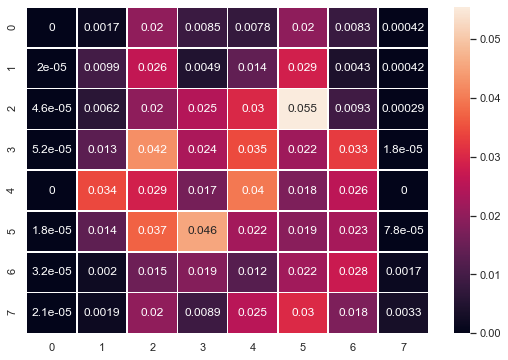

In [49]:
# heatmap for importance of each pixel 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # sns.set_theme()

# Load the example flights dataset and convert to long-form
# digits_long = sns.load_dataset("digits")
# digits = digits_long.pivot("month", "year", "passengers")
f, ax = plt.subplots(figsize=(9, 6))

# Draw a heatmap with the numeric values in each cell
sns.heatmap(np.array(rforest_model_final.feature_importances_).reshape((8,8)), annot=True, linewidths=.5, ax=ax)